In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

[(300, 2), (300, 3)]


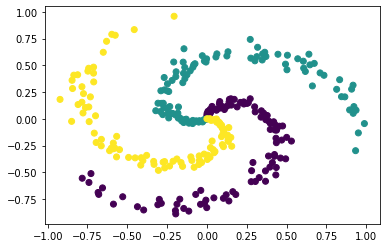

In [2]:
# Data preparation
from dataset import spiral
x, t = spiral.load_data()
print(list(map(lambda x: np.array(x).shape, [x, t])))
plt.scatter(x[:,0], x[:,1], c=np.argmax(t, axis=1))

In [3]:
from common.functions import softmax, sigmoid, cross_entropy_error

epoch=9000 loss=0.027256684953059752
epoch=9000 accu=1.0


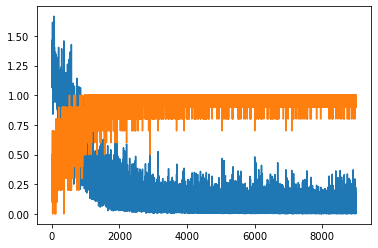

CPU times: user 1.28 s, sys: 108 ms, total: 1.39 s
Wall time: 1.18 s


In [13]:
%%time

# NN structure
hidden = 10
W1 = 0.01 * np.random.randn(len(x[0]), hidden)
b1 = np.zeros(hidden)
W2 = 0.01 * np.random.randn(hidden, len(t[0]))
b2 = np.zeros(len(t[0]))
        
# Hyper parameters
epochs = 300
batch = 10
lr = 1.

# Train NN
loss_list, accu_list = [], []
for epoch in range(epochs):
    idx = np.random.permutation(len(x))
    x, t = x[idx], t[idx]
    
    for n in range(len(x)//batch):
        idx = range(n*batch, (n+1)*batch)
        xx, tt = x[idx], t[idx]
        
        # Forward propagation
        a1 = np.dot(xx, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        yy = softmax(a2)
        l = cross_entropy_error(yy, tt)
        loss_list.append(l)
        a = (tt.argmax(axis=1)==yy.argmax(axis=1)).sum() / len(tt)
        accu_list.append(a)

        # Back propagation
        dout = (yy - tt) / len(tt)    # SoftmaxWithSigma
        
        dx = np.dot(dout, W2.T)       # Affine 2
        dW2 = np.dot(z1.T, dout)
        db2 = np.sum(dout, axis=0)
        dout = dx
        
        dout = dout * (1.0 - z1) * z1 # Sigmoid

        dx = np.dot(dout, W1.T)       # Affine 1
        dW1 = np.dot(xx.T, dout)
        db1 = np.sum(dout, axis=0)
        
        # Update params
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2     

# Plot accuracy over time        
print(f"epoch={len(loss_list)} loss={loss_list[-1]}")
print(f"epoch={len(loss_list)} accu={accu_list[-1]}")
plt.plot(range(len(loss_list)), loss_list)
plt.plot(range(len(accu_list)), accu_list)
plt.show()